In [1]:
import os
import glob

import numpy as np
import pandas as pd

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('..','resources','*.csv')

In [3]:
file_list = glob.glob(dir_base)
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 13


In [4]:
file_list

['../resources/VENETO_IMERG_mean_beta_3h_cores_01.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_03.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_05.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_07.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_10.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_12.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_15.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_17.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_20.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_22.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_22_npix_5.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_25.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_28.csv']

In [5]:
DATA = pd.read_csv(file_list[0])
DATA

,Product,Resolution_t,Cores,Time(min),memory
0,IMERG,3h,1,158.199,6.637


In [6]:
cores_list = []
time_list = []
memorry_list = []
for nn in range(file_len):
    DATA = pd.read_csv(file_list[nn])
    cores_list.append(DATA['Cores'].values)
    time_list.append(DATA['Time(min)'].values)
    memorry_list.append(DATA['memory'].values)

In [7]:
cores_levels = []
for nn in range(file_len):
    cores_levels.append(cores_list[nn][0])

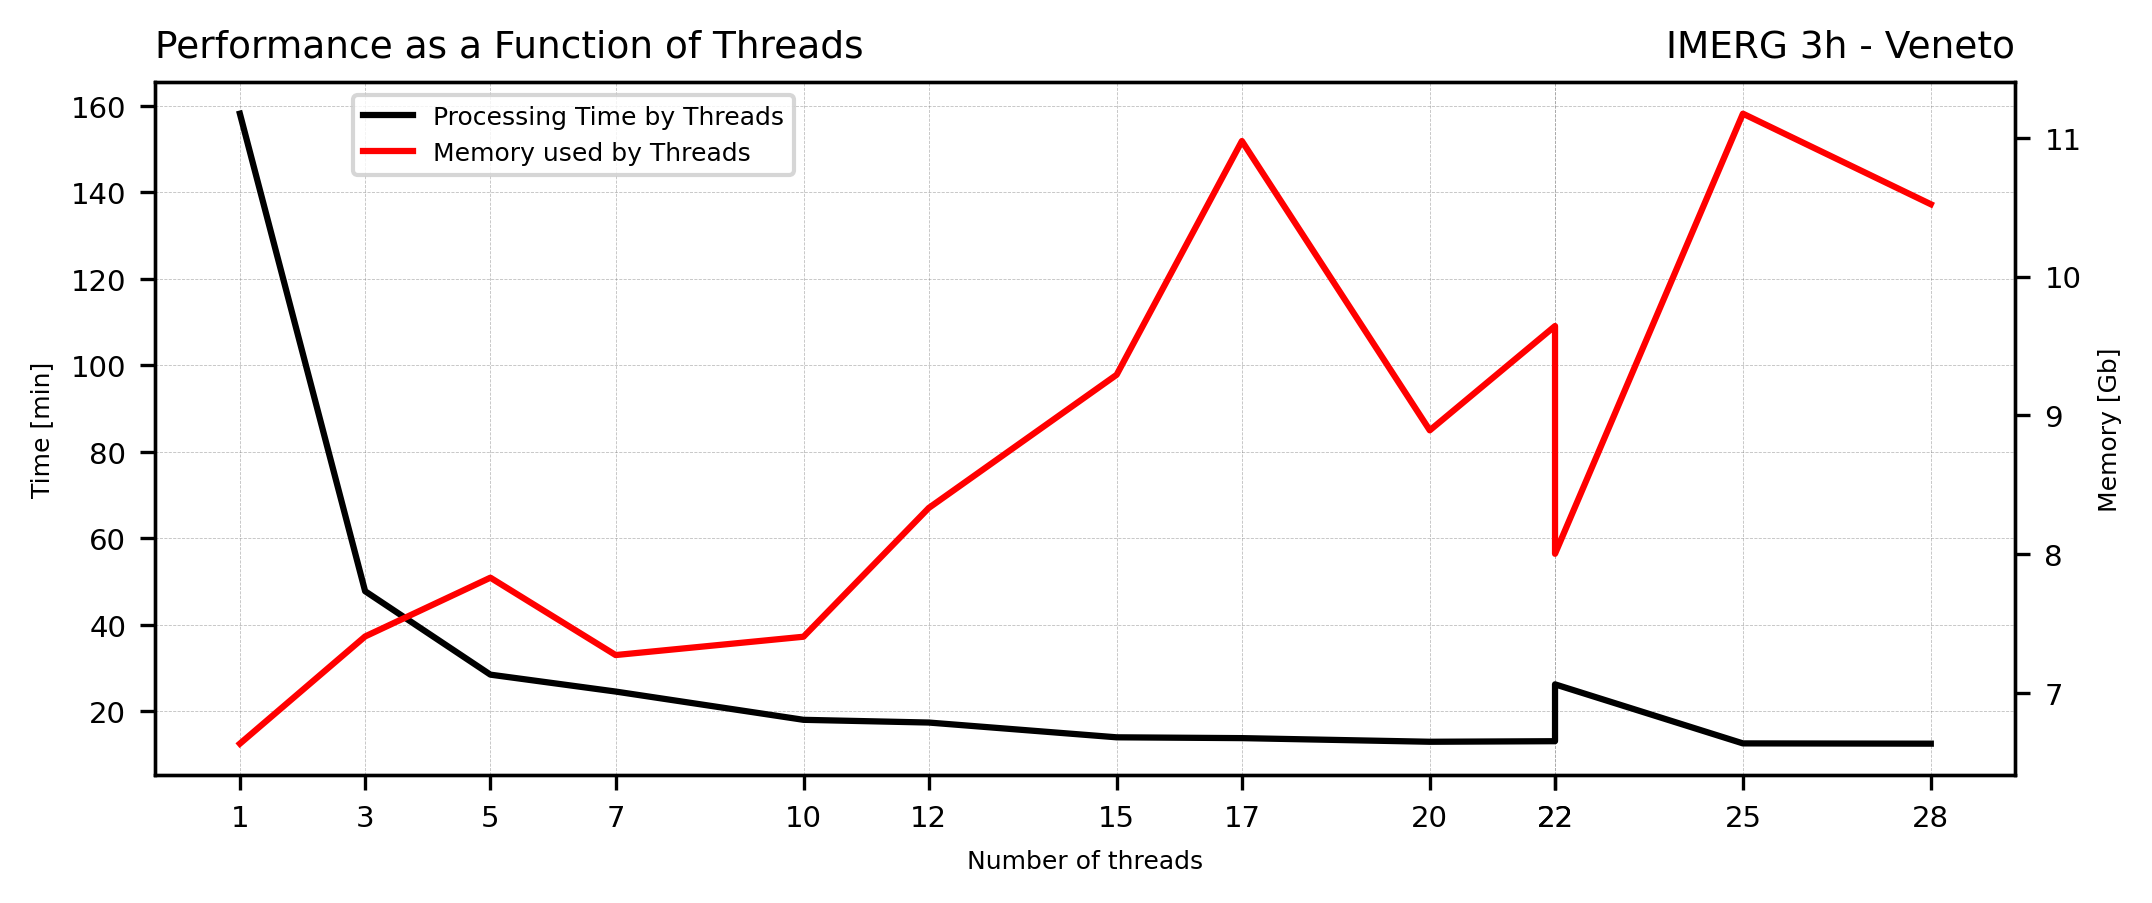

In [8]:
fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#========================================================================
ax1 = plt.subplot(gs[0, 0])
line1, = ax1.plot(cores_list,time_list,'-k',label='Processing Time by Threads')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('Time [min]',fontsize=6)
ax1.set_xlabel('Number of threads',fontsize=6)
ax1.set_xticks(cores_levels)

ax2 = ax1.twinx()
line2, = ax2.plot(cores_list,memorry_list,'-r',label='Memory used by Threads')

ax2.set_xticks(cores_levels)
ax2.tick_params(axis='both', which='major', labelsize=7)

ax1.set_title('Performance as a Function of Threads',fontsize=9, loc='left')
ax1.set_title('IMERG 3h - Veneto',fontsize=9, loc='right')
ax2.set_ylabel('Memory [Gb]',fontsize=6)

ax1.grid(linewidth=0.2, linestyle='--', color='gray', alpha=0.5)

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, fontsize=6, bbox_to_anchor=(0.35, 1))

# ==============================================================================
ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [9]:
cores_pos = np.array([1, 3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 28])
cores_pos1 = cores_pos + 0.3
cores_pos2 = cores_pos - 0.3
time_beta = np.array([158, 47, 28, 24, 18, 17, 13.9, 13.8, 12.9, 12.8, 12.5, 12.4])
time_gamma = np.array([440, 188, 92, 78, 72, 52.7, 50.6, 41.27, 40.1, 40, 39, 38.6])
time_T = time_beta + time_gamma

In [10]:
memorry_list = [6.6, 7.7, 7.8, 7.2, 7.4, 8.3, 9.2, 8.9, 8.8, 9.6, 10.35, 10.52, 10.8]
len(memorry_list)

13

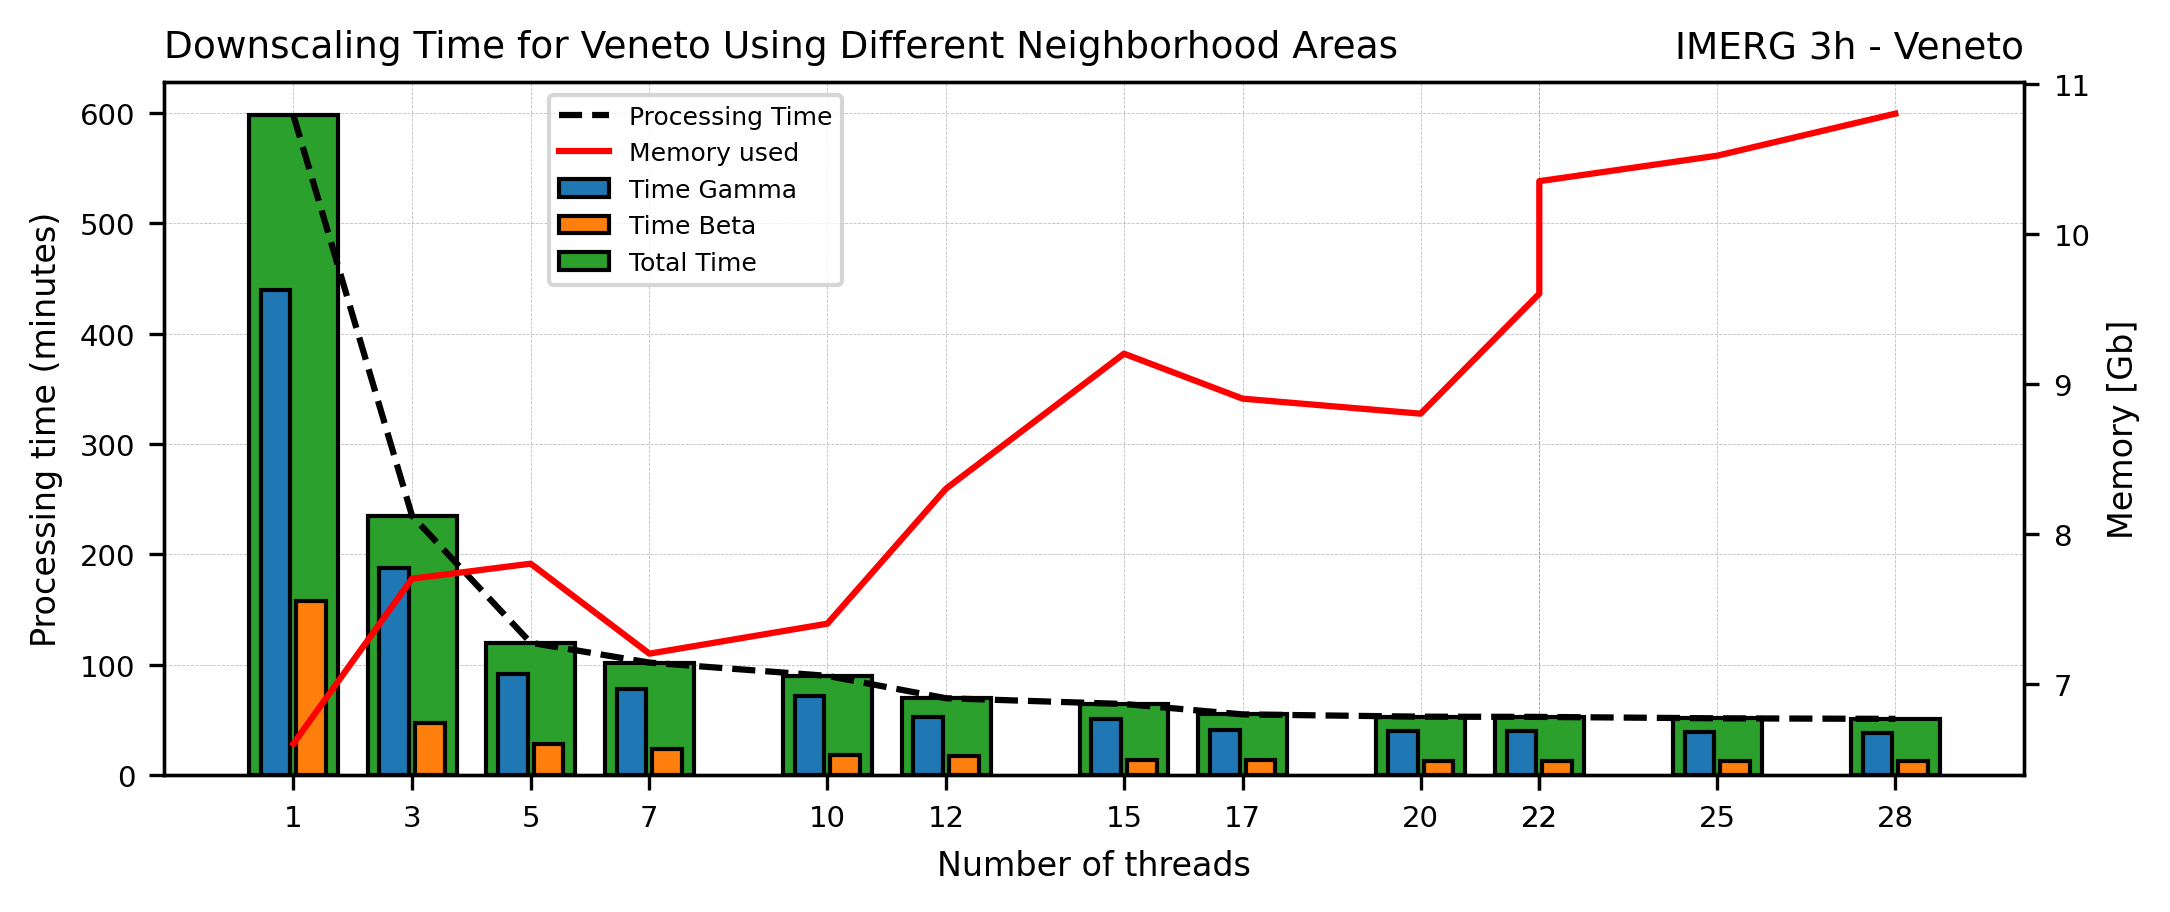

In [11]:
fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#========================================================================
ax1 = plt.subplot(gs[0, 0])
bar1 = ax1.bar(cores_pos2,time_gamma, width=0.5, edgecolor='k', label='Time Gamma', zorder=15)
bar2 = ax1.bar(cores_pos1,time_beta, width=0.5, edgecolor='k', label='Time Beta', zorder=15)
bar3 = ax1.bar(cores_pos,time_T, width=1.5, edgecolor='k', label='Total Time', zorder=10)
line1, = ax1.plot(cores_pos,time_T,'--k',linewidth=1.5,label='Processing Time', zorder=18)
ax1.plot([],[],'-r',label='Memory used')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('Time [min]',fontsize=6)
ax1.set_xlabel('Number of threads',fontsize=6)
ax1.set_xticks(cores_levels)

ax1.grid(linewidth=0.2, linestyle='--', color='gray', alpha=0.5)

ax2 = ax1.twinx()
line2, = ax2.plot(cores_list,memorry_list,'-r')

ax2.set_xticks(cores_levels)
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.set_ylabel('Memory [Gb]',fontsize=8)

ax1.set_xlabel(f'Number of threads', fontsize=8)
ax1.set_ylabel(f'Processing time (minutes)', fontsize=8)
ax1.set_title('Downscaling Time for Veneto Using Different Neighborhood Areas', fontsize=9, loc='left')
ax1.set_title('IMERG 3h - Veneto',fontsize=9, loc='right')

ax1.legend(fontsize=6, bbox_to_anchor=(0.2, 1))
# ax1.legend(fontsize=7)

# ==============================================================================
ax1.set_facecolor('white')
fig.patch.set_alpha(0)

## ICEA-DHC Cluster

In [12]:
product_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'PERSIANN', 'SM2RAIN']

In [13]:
dir_in = os.path.join('..','csv','DOWN_INFO.csv')
INFO = pd.read_csv(dir_in)
INFO = INFO[INFO['Region']=='ITALY']
INFO = INFO.reset_index(drop=True, inplace=False)

INFO['Label'] = INFO['Product'] + ' (' + INFO['Cores'].astype(str) + ' cores)'

INFO

ParserError: Error tokenizing data. C error: Expected 8 fields in line 47, saw 15


In [ ]:
color_MANUAL = ['r', 'b', 'c', 'g']
cores_list = INFO['Cores'].values

Text(0.0, 1.0, 'Downscaling Time for Italy')

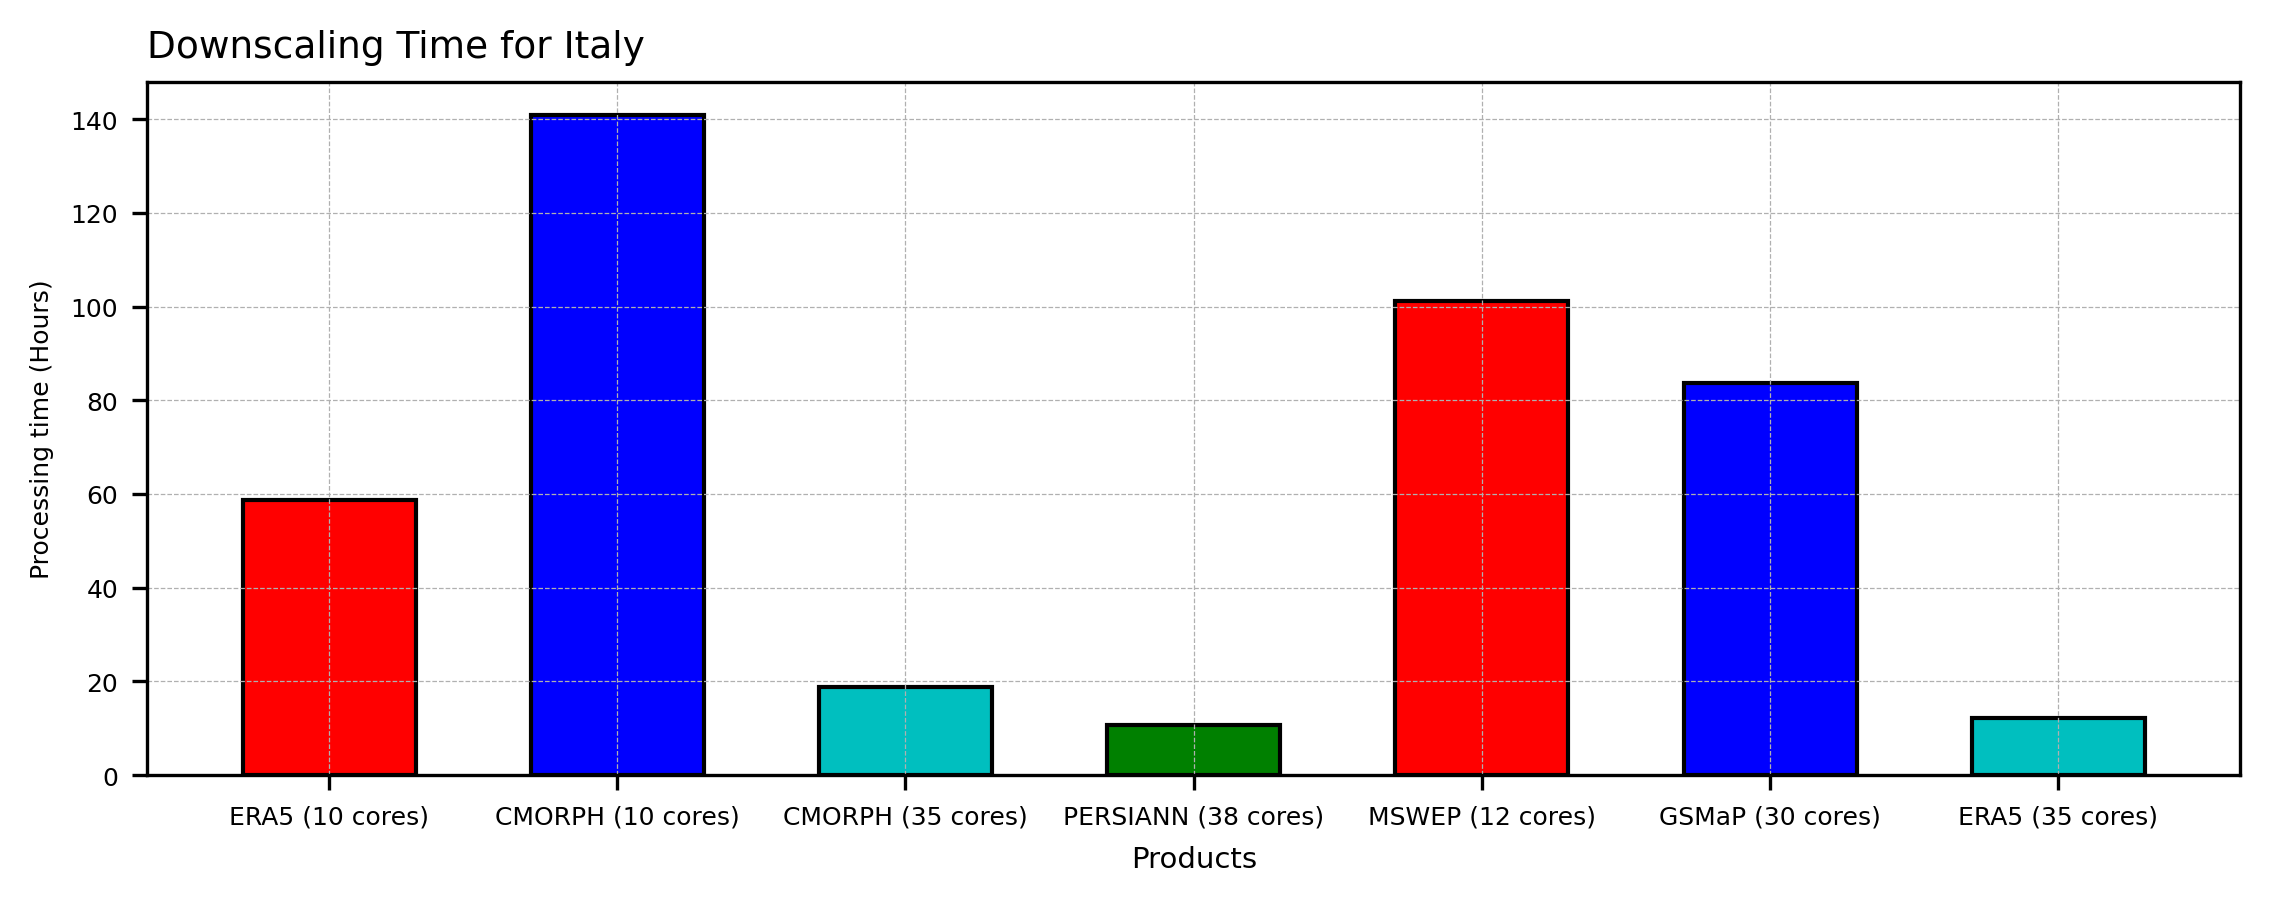

In [ ]:
fig = plt.figure(figsize=(9,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#=========================================================================================
ax1 = plt.subplot(gs[0, 0])
barras = ax1.bar(INFO['Label'], INFO['Time(min)']/60, color=color_MANUAL, width=0.6, edgecolor='k')

ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_xlabel(f'Products', fontsize=7)
ax1.set_ylabel(f'Processing time (Hours)', fontsize=6)
ax1.set_title('Downscaling Time for Italy', fontsize=9, loc='left')

## artifitial data only for explanation

In [19]:
product_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'GSMaP', 'CHIRPS']
product_time3 = [180, 80, 170, 92, 195, 320]
product_time5 = [205, 100, 186, 112, 225, 405]
product_time7 = [255, 170, 237, 170, 298, 710]

INFO = pd.DataFrame({'product':product_list, 
                    '3x3':product_time3,
                    '5x5':product_time5,
                    '7x7':product_time7})

In [21]:
color_MANUAL = ['r', 'b', 'c', 'g', 'purple', 'cyan']

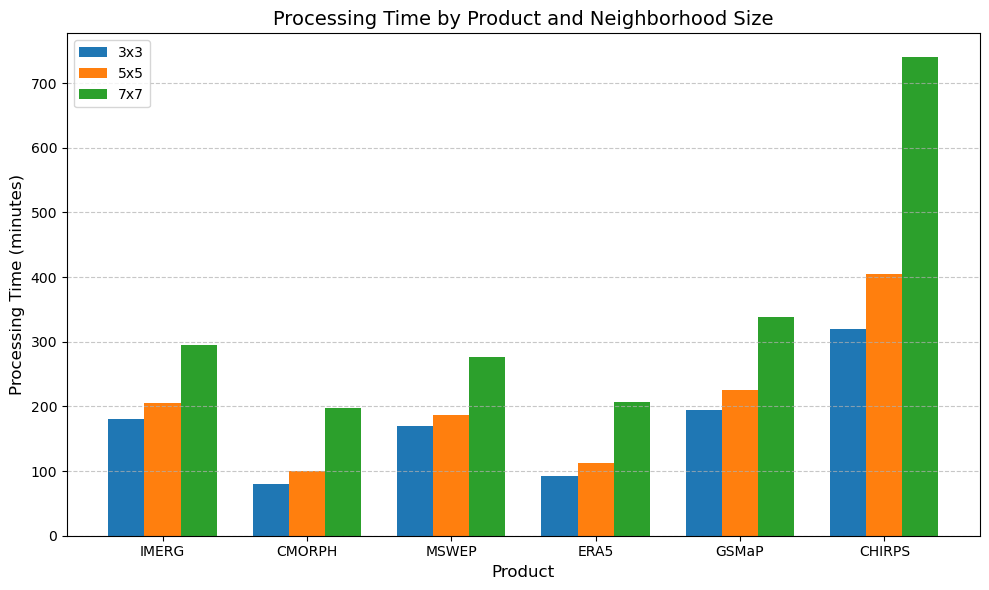

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos
product_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'GSMaP', 'CHIRPS']
product_time3 = [180, 80, 170, 92, 195, 320]
product_time5 = [205, 100, 186, 112, 225, 405]
product_time7 = [295, 198, 277, 207, 338, 740]

# Crear DataFrame
INFO = pd.DataFrame({
    'product': product_list,
    '3x3': product_time3,
    '5x5': product_time5,
    '7x7': product_time7
})

# Preparar datos para el gráfico
bar_width = 0.25
x = np.arange(len(INFO['product']))

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar las barras
ax.bar(x - bar_width, INFO['3x3'], width=bar_width, label='3x3')
ax.bar(x, INFO['5x5'], width=bar_width, label='5x5')
ax.bar(x + bar_width, INFO['7x7'], width=bar_width, label='7x7')

# Etiquetas y leyenda
ax.set_xlabel('Product', fontsize=12)
ax.set_ylabel('Processing Time (minutes)', fontsize=12)
ax.set_title('Processing Time by Product and Neighborhood Size', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(INFO['product'])
ax.legend()

# Ajustes finales
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)